In [70]:
import pandas as pd
from string import ascii_letters
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler 
from sklearn.cluster import DBSCAN


In [71]:
df = pd.read_csv('Car_sales.csv')
df

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
2,Acura,CL,14.114,18.225,Passenger,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,1/4/2012,NaN
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,Volvo,V40,3.545,NaN,Passenger,24.40,1.9,160.0,100.5,67.6,176.6,3.042,15.8,25.0,9/21/2011,66.498812
153,Volvo,S70,15.245,NaN,Passenger,27.50,2.4,168.0,104.9,69.3,185.9,3.208,17.9,25.0,11/24/2012,70.654495
154,Volvo,V70,17.531,NaN,Passenger,28.80,2.4,168.0,104.9,69.3,186.2,3.259,17.9,25.0,6/25/2011,71.155978
155,Volvo,C70,3.493,NaN,Passenger,45.50,2.3,236.0,104.9,71.5,185.7,3.601,18.5,23.0,4/26/2011,101.623357


In [72]:
df1=df.copy()
df1.dropna(inplace=True)

In [73]:
df=df.drop(['Manufacturer','Model','Vehicle_type','Latest_Launch'], axis=1)
df.head()

,Sales_in_thousands,__year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor
0,16.919,16.360,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,58.280150
1,39.384,19.875,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,91.370778
2,14.114,18.225,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,NaN
3,8.588,29.725,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,91.389779
4,20.397,22.255,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,62.777639


In [74]:
df.dropna(inplace=True)

In [75]:
df.isnull().sum()

Sales_in_thousands     0
__year_resale_value    0
Price_in_thousands     0
Engine_size            0
Horsepower             0
Wheelbase              0
Width                  0
Length                 0
Curb_weight            0
Fuel_capacity          0
Fuel_efficiency        0
Power_perf_factor      0
dtype: int64

In [76]:
std_scaler = StandardScaler()
df_scaled = std_scaler.fit_transform(df)

df_std = pd.DataFrame(df_scaled,columns=df.columns)
df_std

,Sales_in_thousands,__year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor
0,-0.564554,-0.144648,-0.317230,-1.188519,-0.707601,-0.764273,-1.106603,-1.110752,-1.152084,-1.220853,0.884790,-0.648864
1,-0.263968,0.159525,0.172510,0.143989,0.749354,0.096494,-0.253125,0.375767,0.324491,-0.162192,0.200734,0.640645
2,-0.676024,1.011901,1.137795,0.429526,0.492244,0.907361,0.059816,0.644065,0.884513,0.049540,-0.483322,0.641385
3,-0.518017,0.365480,-0.140498,-1.188519,-0.536195,-0.589625,-0.850559,-0.704679,-0.548336,-0.373924,0.656772,-0.473601
4,-0.539653,0.477976,0.566432,-0.236728,0.320838,0.171343,1.396931,0.310505,0.398488,0.181873,-0.483322,0.375435
...,...,...,...,...,...,...,...,...,...,...,...,...
112,-0.660329,-0.571701,-0.785677,-0.998161,-1.136117,-1.051195,-0.822110,-1.770621,-0.936820,-0.876788,0.428753,-1.090627
113,0.329268,-0.414639,-0.657919,-0.998161,-1.136117,-1.051195,-0.822110,-1.118003,-0.792190,-0.876788,0.428753,-1.063569
114,-0.107179,-0.113062,-0.338523,-1.188519,-0.536195,-0.115579,-0.765212,-0.262349,-0.472658,-0.373924,0.656772,-0.515542
115,-0.662898,-0.126043,-0.424405,-0.998161,-1.136117,-1.238318,-1.277298,-1.980909,-0.412115,-1.088521,0.428753,-1.014112


eps : 0.9 
Min samples: 3 
Outlier :  2


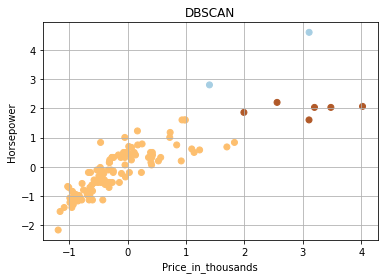

eps : 0.9 
Min samples: 4 
Outlier :  2


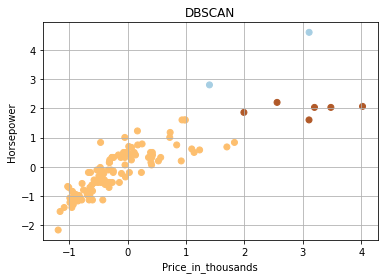

eps : 0.9 
Min samples: 5 
Outlier :  3


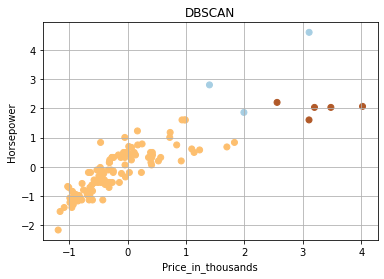

eps : 1.1 
Min samples: 3 
Outlier :  2


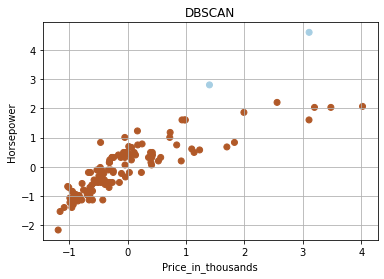

eps : 1.1 
Min samples: 4 
Outlier :  2


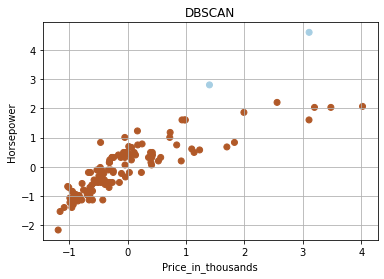

eps : 1.1 
Min samples: 5 
Outlier :  2


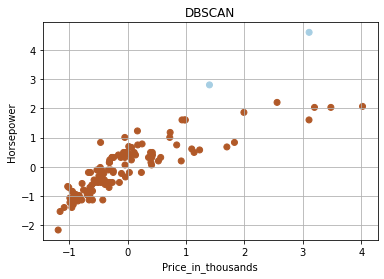

eps : 1.2 
Min samples: 3 
Outlier :  1


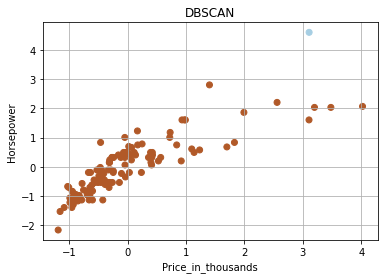

eps : 1.2 
Min samples: 4 
Outlier :  1


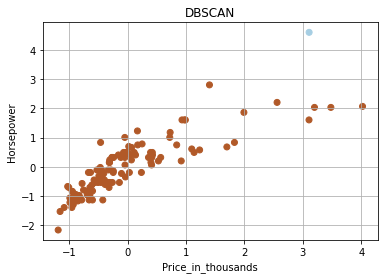

eps : 1.2 
Min samples: 5 
Outlier :  1


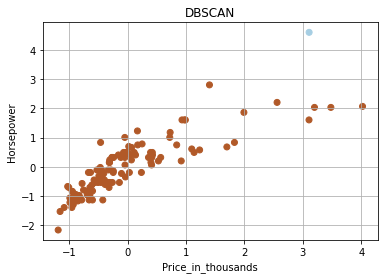

eps : 1.3 
Min samples: 3 
Outlier :  1


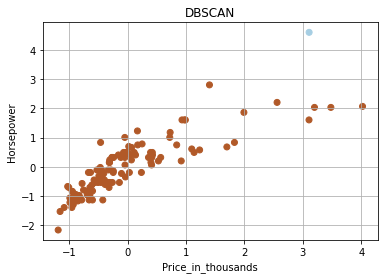

eps : 1.3 
Min samples: 4 
Outlier :  1


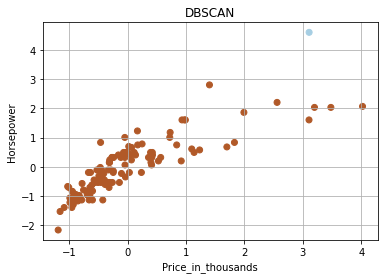

eps : 1.3 
Min samples: 5 
Outlier :  1


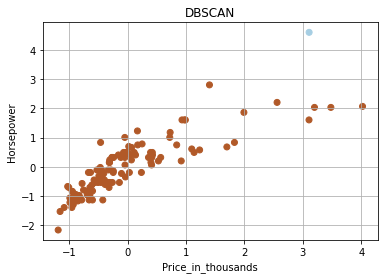

In [77]:
# TASK 1
eps= [0.9,1.1,1.2,1.3]
min_samples= [3,4,5]

for i in eps:
    for z in min_samples:
        dbscan = DBSCAN(eps=i, min_samples=z)
        df_std['clusterid'] = dbscan.fit_predict(df_std[['Price_in_thousands','Horsepower']])
        y_pred=df_std['clusterid']
        x=df_std['clusterid'].max() + 1
        outlier = np.sum(df_std['clusterid']==-1)
        print('eps :',i,'\nMin samples:',z,'\nOutlier : ',outlier)
        plt.scatter(df_std['Price_in_thousands'], df_std['Horsepower'],c=y_pred, cmap='Paired')
        plt.title("DBSCAN")
        plt.grid()
        plt.xlabel('Price_in_thousands')
        plt.ylabel('Horsepower')
        plt.show()

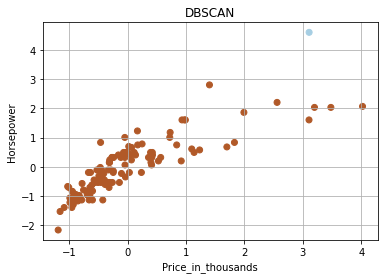

In [78]:
# TASK 2
eps= 1.3
min_samples= 5

dbscan = DBSCAN(eps=eps, min_samples=min_samples)
df_std['clusterid'] = dbscan.fit_predict(df_std[['Price_in_thousands','Horsepower']])
y_pred=df_std['clusterid']
plt.scatter(df_std['Price_in_thousands'], df_std['Horsepower'],c=y_pred, cmap='Paired',)
plt.title("DBSCAN")
plt.grid()
plt.xlabel('Price_in_thousands')
plt.ylabel('Horsepower')
plt.show()

In [79]:
df_std['clusterid'].unique()

array([ 0, -1], dtype=int64)

In [80]:
df_std[['Price_in_thousands','Horsepower']][df_std['clusterid']==0].describe()

,Price_in_thousands,Horsepower
count,116.000000,116.000000
mean,-0.026773,-0.039707
std,0.965815,0.911768
min,-1.187761,-2.164556
25%,-0.639678,-0.707601
50%,-0.307116,-0.124819
75%,0.239264,0.492244
max,4.019455,2.806232


In [81]:
df_std[['Price_in_thousands','Horsepower']][df_std['clusterid']==-1].describe()

,Price_in_thousands,Horsepower
count,1.000000,1.000000
mean,3.105628,4.605999
std,NaN,NaN
min,3.105628,4.605999
25%,3.105628,4.605999
50%,3.105628,4.605999
75%,3.105628,4.605999
max,3.105628,4.605999


In [82]:
# TASK 3
from sklearn.cluster import  AgglomerativeClustering
model = AgglomerativeClustering(n_clusters=4, linkage = 'average')

model = model.fit(df_std)

model

AgglomerativeClustering(linkage='average', n_clusters=4)

In [83]:
df2=df_std[['Price_in_thousands','Horsepower']]
df2

,Price_in_thousands,Horsepower
0,-0.317230,-0.707601
1,0.172510,0.749354
2,1.137795,0.492244
3,-0.140498,-0.536195
4,0.566432,0.320838
...,...,...
112,-0.785677,-1.136117
113,-0.657919,-1.136117
114,-0.338523,-0.536195
115,-0.424405,-1.136117


No. of Cluster :  2 
Linkage :  average


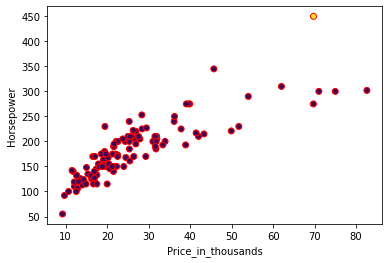

No. of Cluster :  2 
Linkage :  complete


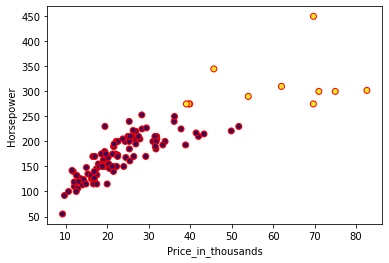

No. of Cluster :  2 
Linkage :  single


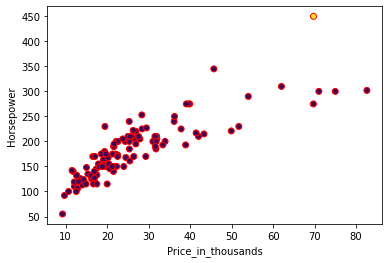

No. of Cluster :  2 
Linkage :  ward


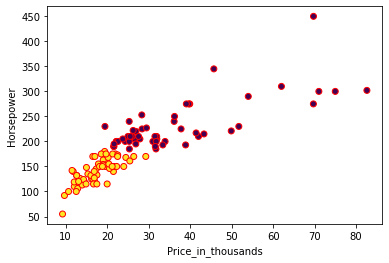

No. of Cluster :  3 
Linkage :  average


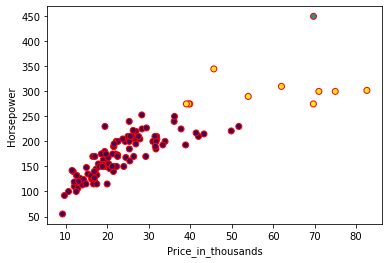

No. of Cluster :  3 
Linkage :  complete


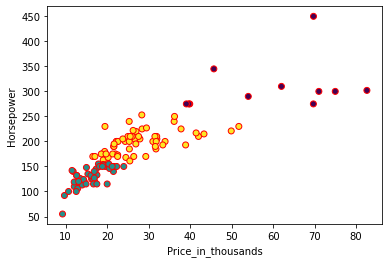

No. of Cluster :  3 
Linkage :  single


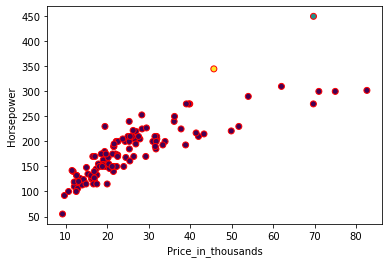

No. of Cluster :  3 
Linkage :  ward


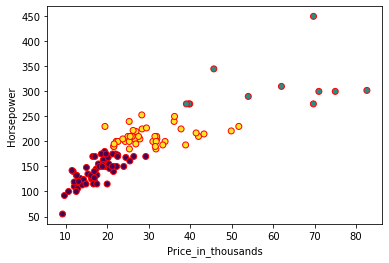

No. of Cluster :  4 
Linkage :  average


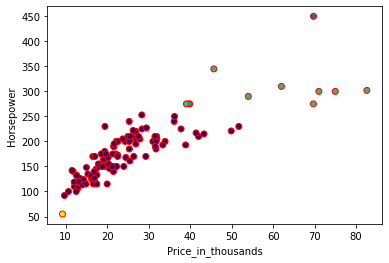

No. of Cluster :  4 
Linkage :  complete


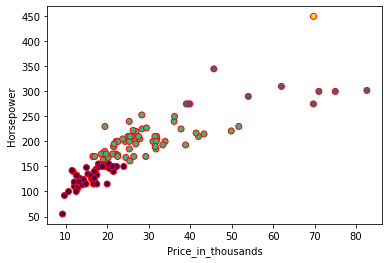

No. of Cluster :  4 
Linkage :  single


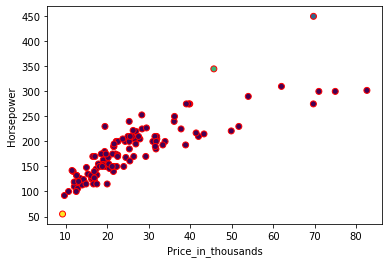

No. of Cluster :  4 
Linkage :  ward


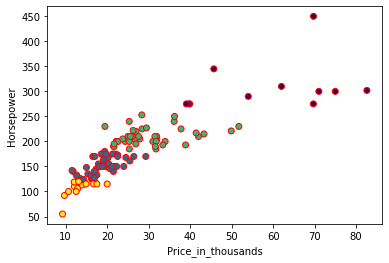

No. of Cluster :  5 
Linkage :  average


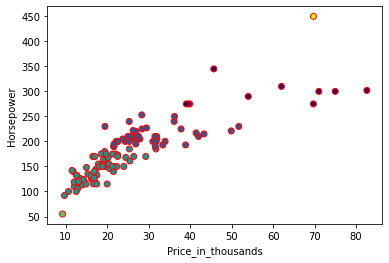

No. of Cluster :  5 
Linkage :  complete


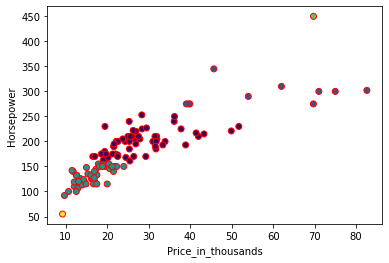

No. of Cluster :  5 
Linkage :  single


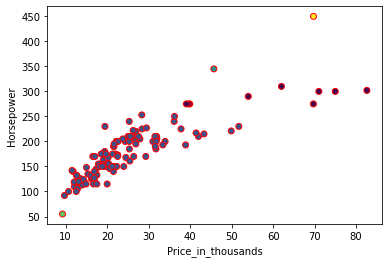

No. of Cluster :  5 
Linkage :  ward


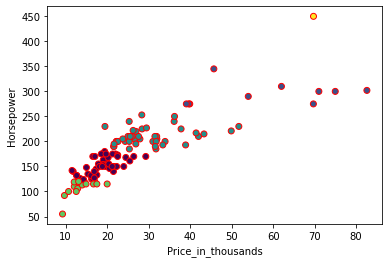

No. of Cluster :  6 
Linkage :  average


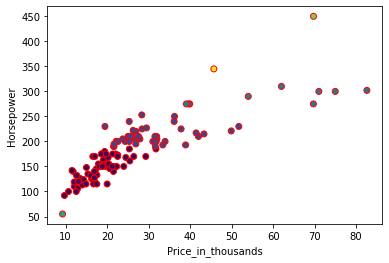

No. of Cluster :  6 
Linkage :  complete


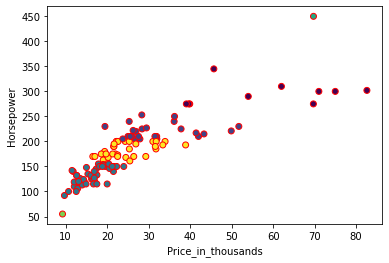

No. of Cluster :  6 
Linkage :  single


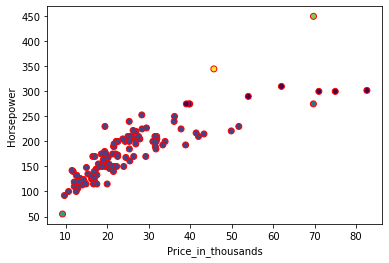

No. of Cluster :  6 
Linkage :  ward


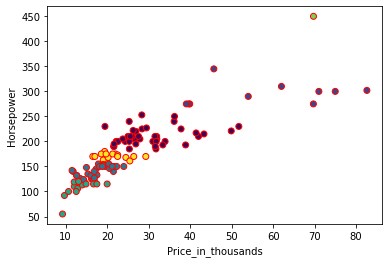

In [84]:
n_clusters = [2,3,4,5,6]
linkage = ['average','complete','single','ward']

for x in n_clusters:
    for y in linkage:
        model = AgglomerativeClustering(n_clusters=x, linkage=y)
        pred = model.fit_predict(df1[['Price_in_thousands','Horsepower']])
        print('No. of Cluster : ',x,'\nLinkage : ',y)
        plt.xlabel('Price_in_thousands')
        plt.ylabel('Horsepower')
        plt.scatter(df1['Price_in_thousands'], df1['Horsepower'], c= pred, edgecolor ="red")
        
        plt.show()

In [86]:
# TASK 4
df2.index = df1['Manufacturer']

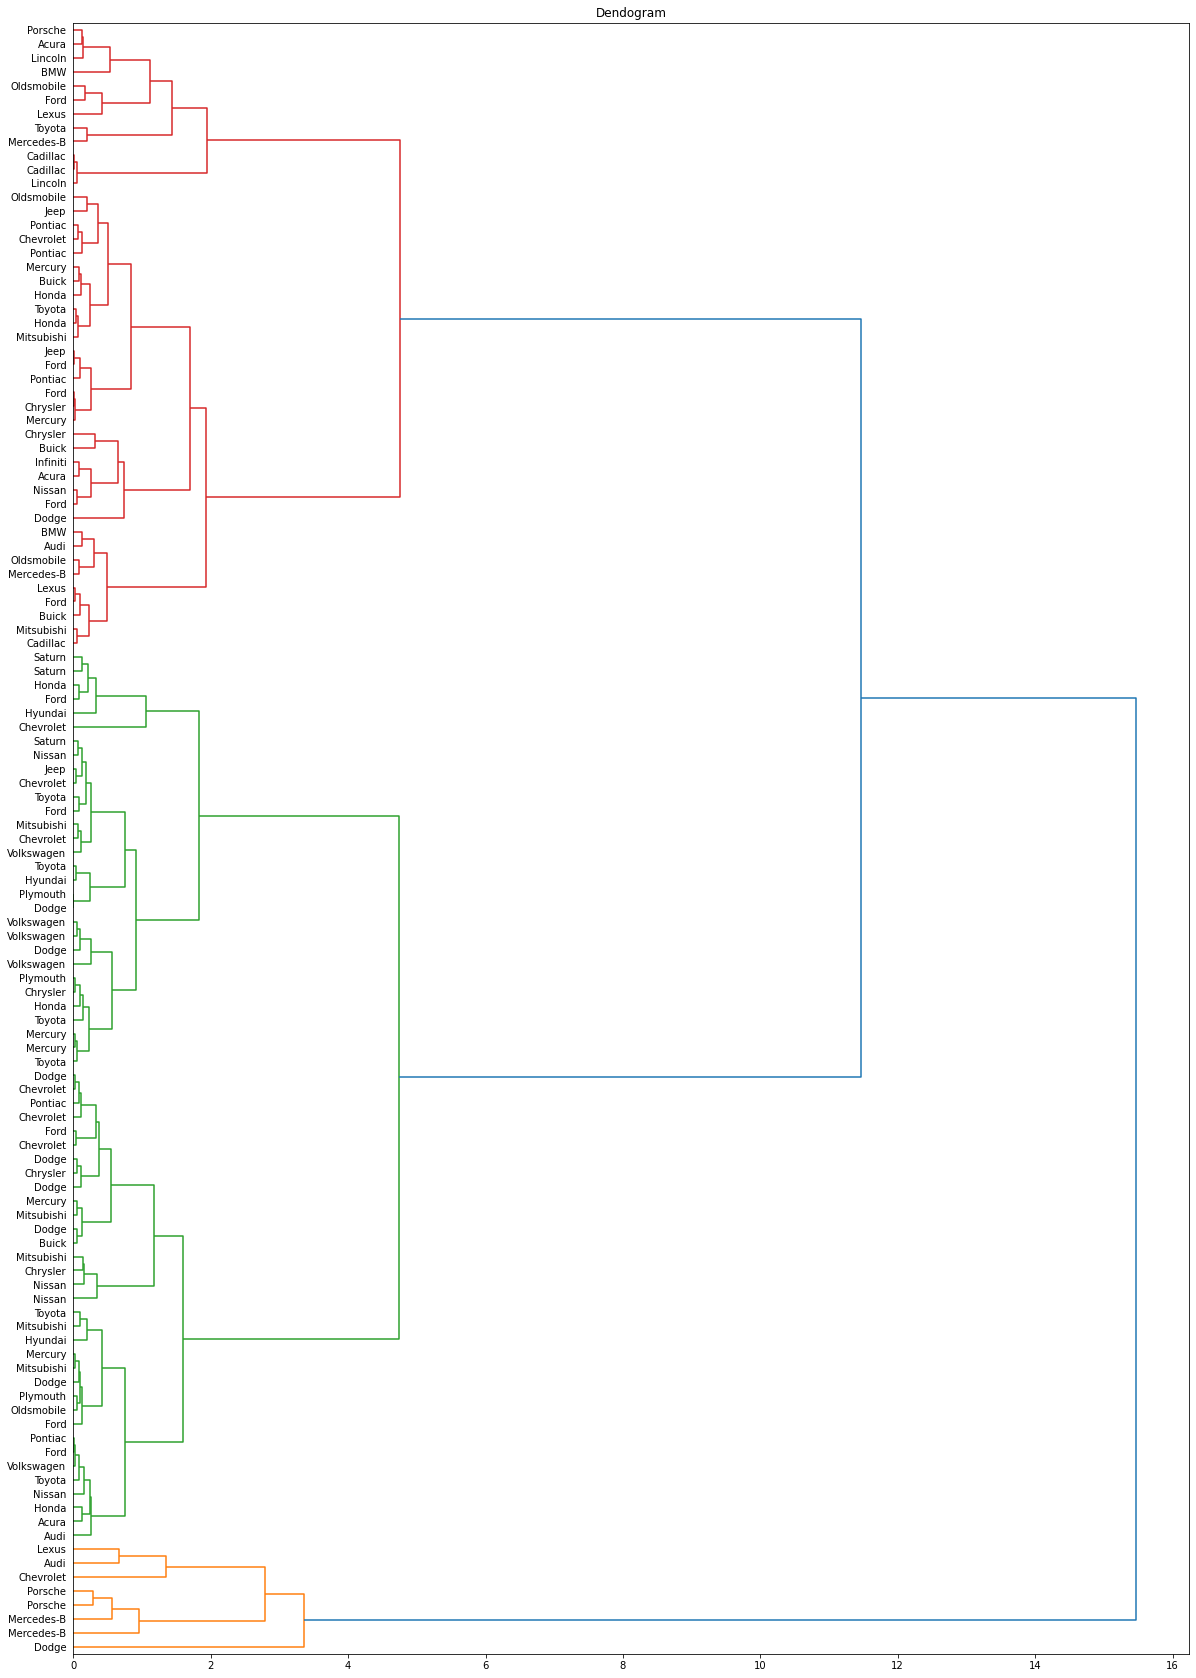

In [88]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(20,30))
plt.title('Dendogram')

dend = shc.dendrogram(shc.linkage(df2, method='ward'), labels=df2.index, orientation= 'right')
ax = plt.gca()
ax.tick_params(axis='y', which='major', labelsize=10)